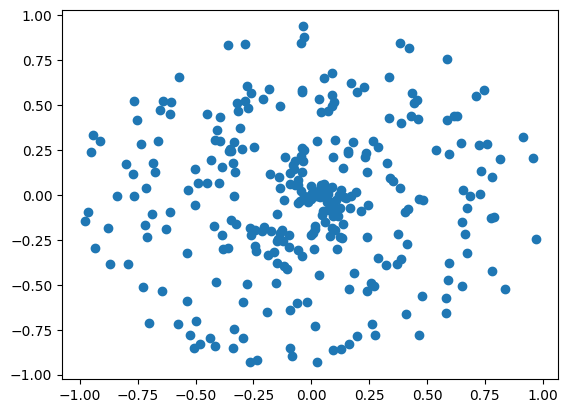

In [111]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X,y = spiral_data(samples=100,classes=3)
plt.scatter(X[:,0],X[:,1])
plt.show()

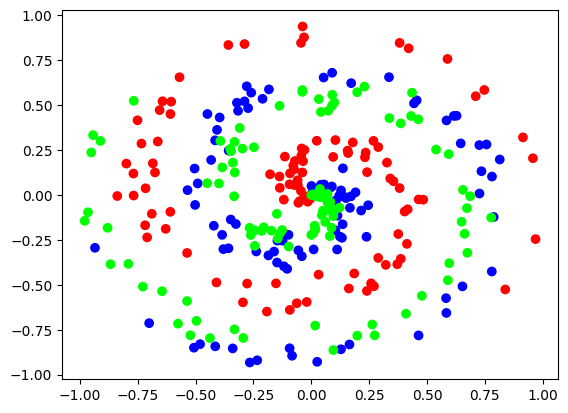

In [112]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.show()

THE NEURAL NETWORK WILL BE UNAWARE OF THE COLORS AS THE DATA HAVE NO CLASS ENCODINGS

DENSER LAYER CLASS

In [113]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

# DENSE LAYER
class Layer_Dense:
    # Layer Initialization
    def __init__(self,n_inputs,n_neurons):
        #Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))

    # Forward Pass
    def forward(self,inputs):
        # Calculate output values from inputs,weights and biases
        self.output = np.dot(inputs,self.weights) + self.biases


# Create dataset
X,y = spiral_data(samples=100,classes=3)
# Create Dense Layer with 2 input features and 3 ouput values
dense1 = Layer_Dense(2,3)
# Perform a forward pass of oour training data through this layer
dense1.forward(X)

# Let's see output of the first few samples:
print(dense1.output[:10])

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]
 [-3.5430698e-04  3.5025488e-04 -2.3363481e-04]
 [-8.9267001e-04  1.0767876e-03 -1.9453237e-04]
 [-9.3350781e-04  1.0723802e-03 -3.1227397e-04]
 [-1.1243758e-03  1.3112801e-03 -3.3629674e-04]
 [-1.3386955e-03  1.6200906e-03 -2.8101794e-04]]


ACTIVATION FUNCTION : RELU

In [114]:
import numpy as np
inputs = [0,2,-1,3.3,-2.7,1.1,2.2,-100]
output = np.maximum(0,inputs)
print(output)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [115]:
# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self,inputs):
        # Calculate output values from input
        self.output = np.maximum(0,inputs)

In [116]:
# Create datasets
X,y = spiral_data(samples=100,classes=3)
# Create Dense Layer with 2 inputs features and 3 output values
dense1 = Layer_Dense(2,3)
# Create ReLU activation (to be used with Dense Layer):
activation1 = Activation_ReLU()
# Make a forward pass of our training data through this layer
dense1.forward(X)
# Forward pass through activation function
# Takes in output from previous layer
activation1.forward(dense1.output)
# Let's see output of the first few examples:
print(activation1.output[:5])

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


ACTIVATION FUNCTION: SOFTMAX

In [117]:
# Softmax Activation
class Activation_Softmax:
    # Forward pass
    def forward(self,inputs):
        # Get Unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs,axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values,axis=1,keepdims=True)
        self.output = probabilities

In [118]:
# Create dataset
X, y = spiral_data(samples=100,classes=3)

# Create Dense Layer with 2 inputs features and 3 ouput values
dense1 = Layer_Dense(2,3)

# Create ReLU activation (to be used with Dense Layer)
activation1 = Activation_ReLU()

# Create second Dense Layer with 3 inputs features(as we take output of 
# previous layer here) and 3 output values
dense2 = Layer_Dense(3,3)

# Create Softmax Activation (to be used with Dense Layer)
activation2 = Activation_Softmax()

# Make a forward pass of our training data through this layer
dense1.forward(X)

# Make a forward pass through activation function it takes the output of first dense layer here
activation1.forward(dense1.output)

# Make a forward pass through second Dense layer it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Make a forward pass through activation function it takes the output of second dense layer here
activation2.forward(dense2.output)

# Output samples:
print(activation2.output[:5])

[[0.33333334 0.33333334 0.33333334]
 [0.33333364 0.3333334  0.3333329 ]
 [0.33333385 0.3333335  0.33333266]
 [0.33333433 0.3333336  0.33333206]
 [0.33333462 0.33333373 0.33333164]]


 CLACULATING NETWORK ERROR WITH LOSS

CROSS ENTROPY LOSS BUILDING BLOCKS IN PYTHON

In [119]:
softmax_outputs = np.array([[0.7,0.1,0.2],
                            [0.1,0.5,0.4],[0.02,0.9,0.08]])

class_targets=[0,1,1]
print(softmax_outputs[[0,1,2],class_targets])

[0.7 0.5 0.9]


In [120]:
print(-np.log(softmax_outputs[range(len(softmax_outputs)),class_targets]))
neg_log = -np.log(softmax_outputs[range(len(softmax_outputs)),class_targets])
average_loss = np.mean(neg_log)

print(average_loss)

[0.35667494 0.69314718 0.10536052]
0.38506088005216804


IF DATA IS ONE HOT ENCODED ,HOW TO EXTRACT THE RELEVANT PREDICTIONS

In [121]:
y_true_check = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])

y_pred_clipped_check = np.array([
    [0.7,0.1,0.2],
    [0.1,0.5,0.4],
    [0.02,0.9,0.08]
])

A = y_true_check * y_pred_clipped_check
B = np.sum(A, axis=1)
C = -np.log(B)

print(C)

print(np.mean(C))

[0.35667494 0.69314718 2.52572864]
1.191850256268978


IMPLEMENTING THE CATEGORICAL CROSS ENTROPY CLASS

In [122]:
import numpy as np

# Cross-entropy loss (standalone class)
class Loss_CategoricalCrossentropy():
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        
        # Probabilities for target values
        if len(y_true.shape) == 1:  # categorical labels
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:  # one-hot encoded labels
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)

        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    def calculate(self, y_pred, y_true):
        return np.mean(self.forward(y_pred, y_true))

# Test data
softmax_outputs = np.array([[0.7, 0.1, 0.2],
                           [0.1, 0.5, 0.4],
                           [0.02, 0.9, 0.08]])

class_targets = np.array([[1, 0, 0],
                         [0, 1, 0],
                         [0, 1, 0]])

# Calculate loss
loss_function = Loss_CategoricalCrossentropy()
loss = loss_function.calculate(softmax_outputs, class_targets)
print(loss)

0.38506088005216804


In [123]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)
# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)
# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Perform a forward pass of our training data through this layer
dense1.forward(X)
# Perform a forward pass through activation function
# it takes the output of first dense layer here
activation1.forward(dense1.output)

# Perform a forward pass through second Dense layer
# it takes outputs of activation function of first layer as inputs
dense2.forward(activation1.output)
# Perform a forward pass through activation function
# it takes the output of second dense layer here
activation2.forward(dense2.output)
# Let's see output of the first few samples:
print(activation2.output[:5])
# Perform a forward pass through activation function
# it takes the output of second dense layer here and returns loss
loss = loss_function.calculate(activation2.output, y)
# Print loss value
print('loss:', loss)

# Calculate accuracy from output of activation2 and targets
# calculate values along first axis
predictions = np.argmax(activation2.output, axis=1)
if len(y.shape) == 2:
 y = np.argmax(y, axis=1)
accuracy = np.mean(predictions == y)
# Print accuracy
print('acc:', accuracy)

[[0.33333334 0.33333334 0.33333334]
 [0.3333341  0.33333302 0.3333329 ]
 [0.3333341  0.33333302 0.33333296]
 [0.3333341  0.333333   0.33333293]
 [0.3333364  0.33333203 0.33333158]]
loss: 1.0986193
acc: 0.28


In [124]:
import numpy as np
# Probabilities of 3 samples
softmax_outputs = np.array([[0.7, 0.2, 0.1],
 [0.5, 0.1, 0.4],
 [0.02, 0.9, 0.08]])
# Target (ground-truth) labels for 3 samples
class_targets = np.array([0, 1, 1])
# Calculate values along second axis (axis of index 1)
predictions = np.argmax(softmax_outputs, axis=1)
# If targets are one-hot encoded - convert them
if len(class_targets.shape) == 2:
 class_targets = np.argmax(class_targets, axis=1)
# True evaluates to 1; False to 0
accuracy = np.mean(predictions == class_targets)
print('acc:', accuracy)

acc: 0.6666666666666666
